<a href="https://colab.research.google.com/github/nilesh9999/Banglore_hpps/blob/main/predictive_maintenace_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# predictive-maintenace-regression binary classification

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
!pip install scikit-plot
import scikitplot as skplt
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OutputCodeClassifier
from sklearn.metrics import f1_score,fbeta_score,matthews_corrcoef, log_loss, confusion_matrix,classification_report,make_scorer,balanced_accuracy_score, confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, roc_curve, auc,recall_score,roc_auc_score, average_precision_score, precision_score,precision_recall_curve,ConfusionMatrixDisplay, confusion_matrix
from sklearn.model_selection import GridSearchCV, learning_curve
from lightgbm import LGBMClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import (OneHotEncoder, PowerTransformer, StandardScaler)
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multiclass import OneVsOneClassifier
!pip install imblearn
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 10.8 MB/s eta 0:00:00


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving predictive_maintenance1.csv to predictive_maintenance1 (1).csv


In [ ]:
data=pd.read_csv('predictive_maintenance1.csv')

In [ ]:
data.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [ ]:
n = data.shape[0]
# First checks
print('Features non-null values and data type:')
data.info()
print('Check for duplicate values:',
      data['Product ID'].unique().shape[0]!=n)

Features non-null values and data type:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB
Check for duplicate values: False


In [ ]:
data['Tool wear [min]'] = data['Tool wear [min]'].astype('float64')
data['Rotational speed [rpm]'] = data['Rotational speed [rpm]'].astype('float64')

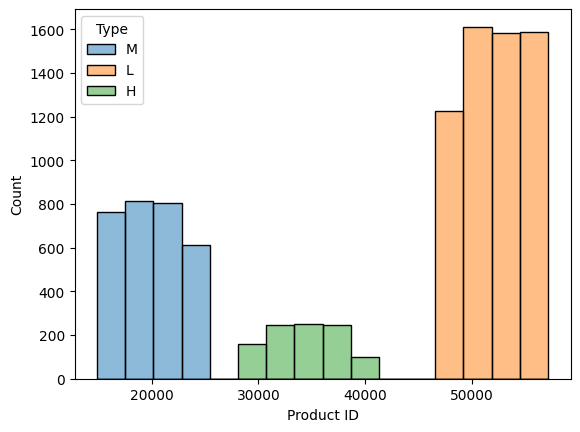

In [ ]:
# Remove first character and set to numeric dtype
data['Product ID'] = data['Product ID'].astype(str)
data['Product ID'] = data['Product ID'].apply(lambda x: x[1:])
data['Product ID'] = pd.to_numeric(data['Product ID'])

# Histogram of ProductID
sns.histplot(data=data, x='Product ID', hue='Type')
plt.show()

In [ ]:
# Drop ID columns
df = data.copy()



In [ ]:
# Drop ID columns
df.drop(columns=['UDI','Product ID'],axis=1, inplace=True)

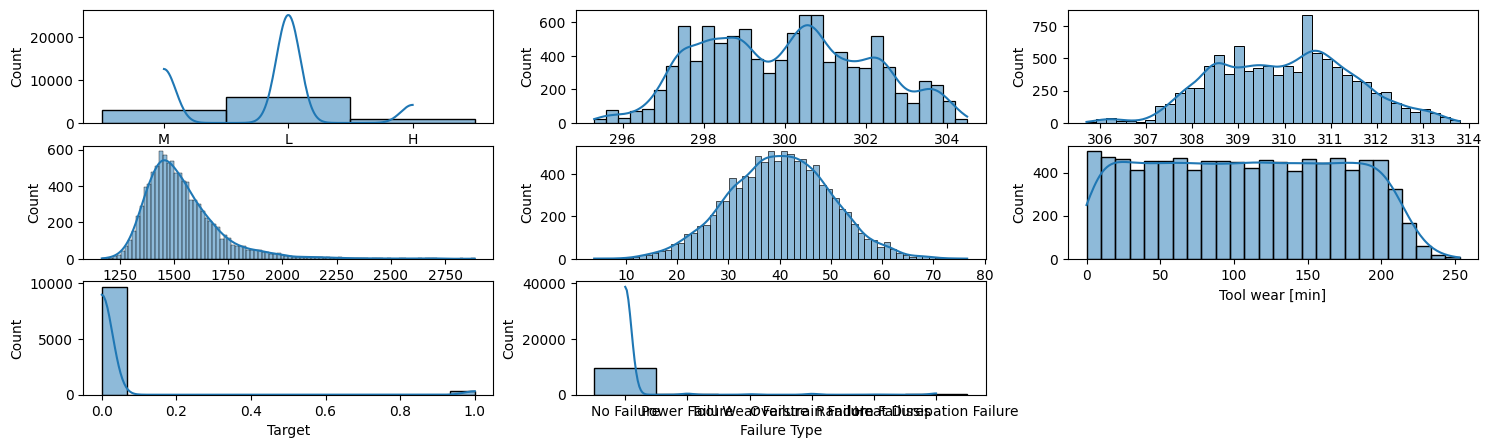

In [ ]:
plt.figure(figsize=(18,5))
for i,col in enumerate(df.columns,1):
    plt.subplot(3,3,i)
    sns.histplot(df[col],kde=True)

array([[<Axes: title={'center': 'Air temperature [K]'}>,
        <Axes: title={'center': 'Process temperature [K]'}>],
       [<Axes: title={'center': 'Rotational speed [rpm]'}>,
        <Axes: title={'center': 'Torque [Nm]'}>],
       [<Axes: title={'center': 'Tool wear [min]'}>,
        <Axes: title={'center': 'Target'}>]], dtype=object)

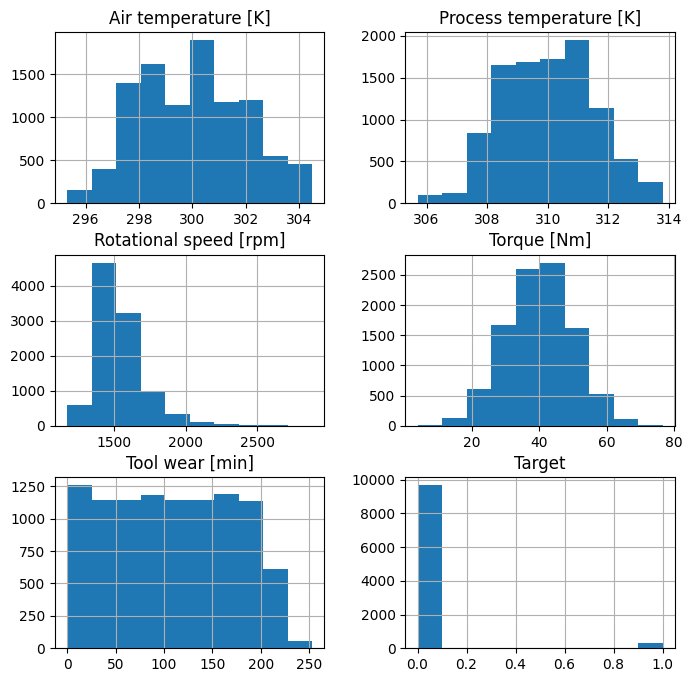

In [ ]:
df.hist(figsize=(8, 8))

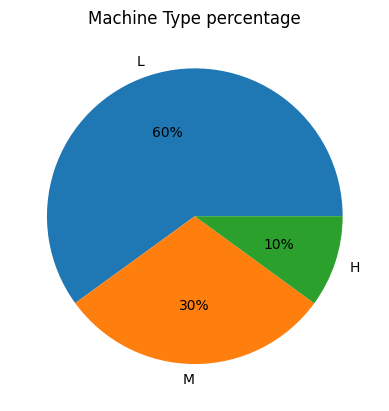

In [ ]:
# Pie chart of Type percentage
value = data['Type'].value_counts()
Type_percentage = 100*value/data.Type.shape[0]
labels = Type_percentage.index.array
x = Type_percentage.array
plt.pie(x, labels = labels, colors=sns.color_palette('tab10')[0:3], autopct='%.0f%%')
plt.title('Machine Type percentage')
plt.show()

In [ ]:
# Create lists of features and target names
features = [col for col in df.columns
            if df[col].dtype=='float64' or col =='Type']
target = ['Target','Failure Type']

In [ ]:
# Portion of data where RNF=1
idx_RNF = df.loc[df['Failure Type']=='Random Failures'].index
df.loc[idx_RNF,target]

,Target,Failure Type
1221,0,Random Failures
1302,0,Random Failures
1748,0,Random Failures
2072,0,Random Failures
2559,0,Random Failures
3065,0,Random Failures
3452,0,Random Failures
5471,0,Random Failures
5489,0,Random Failures
5495,0,Random Failures


In [ ]:
# Portion of data where RNF=1
idx_RNF = df.loc[df['Failure Type']=='Random Failures'].index
df.loc[idx_RNF,target]

,Target,Failure Type
1221,0,Random Failures
1302,0,Random Failures
1748,0,Random Failures
2072,0,Random Failures
2559,0,Random Failures
3065,0,Random Failures
3452,0,Random Failures
5471,0,Random Failures
5489,0,Random Failures
5495,0,Random Failures


In [ ]:
first_drop = df.loc[idx_RNF,target].shape[0]
print('Number of observations where RNF=1 but Machine failure=0:',first_drop)
# Drop corresponding observations and RNF column
df.drop(index=idx_RNF, inplace=True)

Number of observations where RNF=1 but Machine failure=0: 18


In [ ]:
# Portion of data where Machine failure=1 but no failure cause is specified
idx_ambiguous = df.loc[(df['Target']==1) &
                       (df['Failure Type']=='No Failure')].index
second_drop = df.loc[idx_ambiguous].shape[0]
print('Number of ambiguous observations:', second_drop)
display(df.loc[idx_ambiguous,target])
df.drop(index=idx_ambiguous, inplace=True)

Number of ambiguous observations: 9


,Target,Failure Type
1437,1,No Failure
2749,1,No Failure
4044,1,No Failure
4684,1,No Failure
5536,1,No Failure
5941,1,No Failure
6478,1,No Failure
8506,1,No Failure
9015,1,No Failure


In [ ]:
# Global percentage of removed observations
print('Global percentage of removed observations:',
     (100*(first_drop+second_drop)/n))
df.reset_index(drop=True, inplace=True)   # Reset index
n = df.shape[0]

Global percentage of removed observations: 0.27


In [ ]:
df.describe()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
count,9973.000000,9973.000000,9973.000000,9973.000000,9973.000000,9973.000000
mean,300.003259,310.004031,1538.893212,39.978993,107.921087,0.033089
std,2.000548,1.483692,179.412171,9.966805,63.649152,0.178879
min,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,301.500000,311.100000,1612.000000,46.700000,162.000000,0.000000
max,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000


<ipython-input-308-df6b17d8d8b8>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot = True,cmap = "RdYlBu")


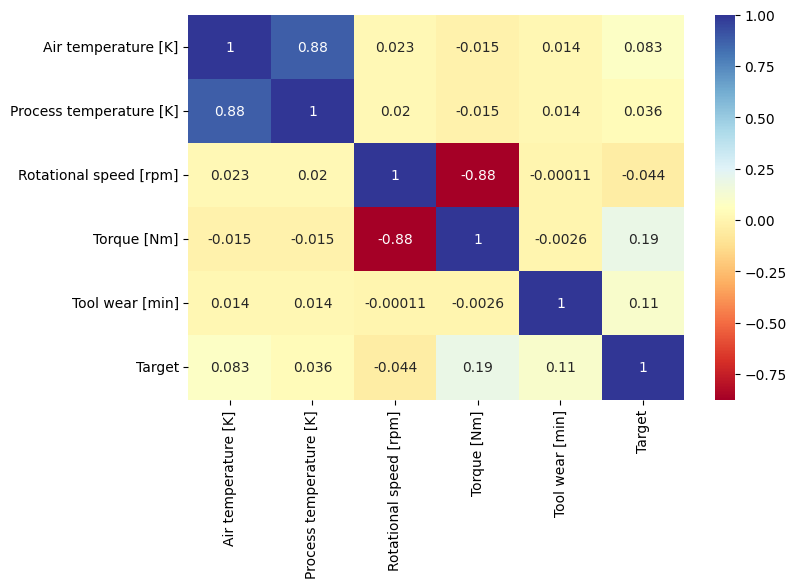

In [ ]:

plt.figure(figsize=(8,5))
sns.heatmap(df.corr(),annot = True,cmap = "RdYlBu")
plt.draw()

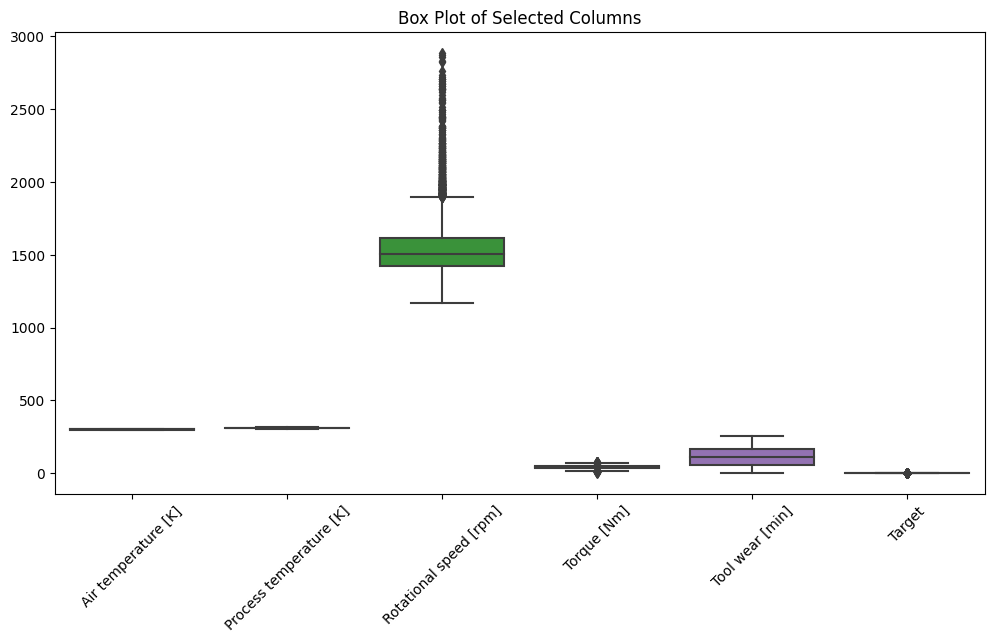

In [ ]:
# Create a box plot to visualize potential outliers for selected columns
selected_columns = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'Target']

plt.figure(figsize=(12, 6))
sns.boxplot(data=df[selected_columns])
plt.title('Box Plot of Selected Columns')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

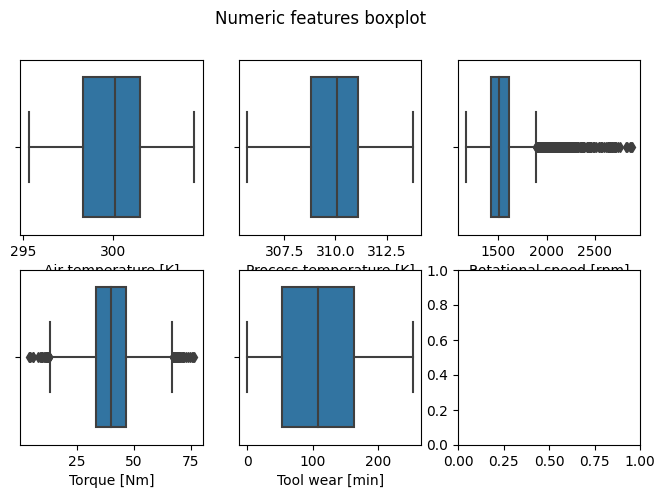

In [ ]:
num_features = [feature for feature in features if df[feature].dtype=='float64']

# boxplot of numeric features
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(8,5))
fig.suptitle('Numeric features boxplot')
for j, feature in enumerate(num_features):
    sns.boxplot(ax=axs[j//3, j-3*(j//3)], data=df, x=feature)
plt.show()

In [ ]:

selected_columns = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'Target']

def detect_outliers(data):
    outliers = []
    threshold = 3
    mean = np.mean(data)
    std = np.std(data)

    for i in data:
        z_score = (i - mean) / std
        if np.abs(z_score) > threshold:
            outliers.append(i)

    return outliers

# Detect outliers for a specific column (e.g., 'Air temperature [K]')
outlier_pt1 = detect_outliers(df['Air temperature [K]'])
outlier_pt2 = detect_outliers(df['Process temperature [K]'])
outlier_pt3 = detect_outliers(df['Rotational speed [rpm]'])
outlier_pt4 = detect_outliers(df['Torque [Nm]'])
outlier_pt5 = detect_outliers(df['Tool wear [min]'])
outlier_pt6 = detect_outliers(df['Target'])

In [ ]:
print(outlier_pt1)
print(outlier_pt2)
print(outlier_pt3)
print(outlier_pt4)
print(outlier_pt5)
print(outlier_pt6)

[]
[]
[2861.0, 2678.0, 2129.0, 2129.0, 2448.0, 2564.0, 2100.0, 2151.0, 2874.0, 2182.0, 2194.0, 2833.0, 2161.0, 2270.0, 2119.0, 2721.0, 2540.0, 2440.0, 2243.0, 2153.0, 2098.0, 2737.0, 2083.0, 2206.0, 2101.0, 2449.0, 2304.0, 2216.0, 2090.0, 2381.0, 2886.0, 2567.0, 2161.0, 2129.0, 2280.0, 2549.0, 2384.0, 2329.0, 2248.0, 2250.0, 2421.0, 2256.0, 2266.0, 2183.0, 2496.0, 2355.0, 2174.0, 2293.0, 2141.0, 2563.0, 2179.0, 2289.0, 2432.0, 2760.0, 2297.0, 2639.0, 2092.0, 2672.0, 2465.0, 2709.0, 2143.0, 2691.0, 2305.0, 2197.0, 2211.0, 2157.0, 2203.0, 2372.0, 2825.0, 2695.0, 2676.0, 2157.0, 2224.0, 2102.0, 2194.0, 2183.0, 2133.0, 2102.0, 2663.0, 2268.0, 2168.0, 2232.0, 2344.0, 2497.0, 2659.0, 2174.0, 2113.0, 2245.0, 2643.0, 2354.0, 2117.0, 2130.0, 2116.0, 2706.0, 2329.0, 2370.0, 2080.0, 2170.0, 2323.0, 2113.0, 2156.0, 2235.0, 2089.0, 2165.0, 2204.0, 2090.0, 2151.0, 2595.0, 2280.0, 2103.0, 2203.0, 2093.0, 2137.0, 2219.0, 2636.0, 2207.0, 2237.0, 2377.0, 2437.0, 2478.0, 2633.0, 2127.0, 2514.0, 2288.0, 2

Failures percentage in data: 3.31


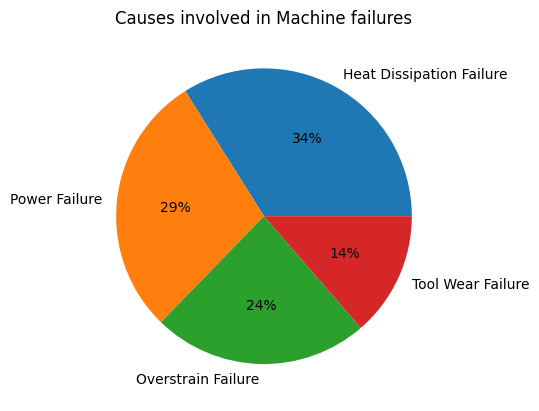

In [ ]:
# Portion of df where there is a failure and causes percentage
idx_fail = df.loc[df['Failure Type'] != 'No Failure'].index
df_fail = df.loc[idx_fail]
df_fail_percentage = 100*df_fail['Failure Type'].value_counts()/df_fail['Failure Type'].shape[0]
print('Failures percentage in data:',
      round(100*df['Target'].sum()/n,2))
# Pie plot
plt.title('Causes involved in Machine failures')
plt.pie(x=df_fail_percentage.array, labels=df_fail_percentage.index.array,
        colors=sns.color_palette('tab10')[0:4], autopct='%.0f%%')
plt.show()

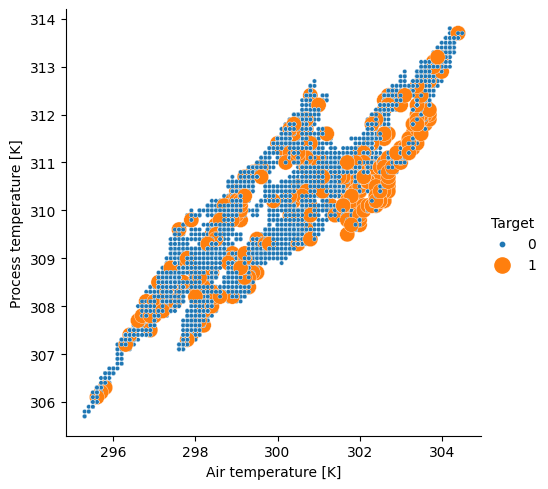

In [ ]:

_ = sns.relplot(x="Air temperature [K]", y="Process temperature [K]", hue="Target",size="Target", sizes=(120, 10),data=df)

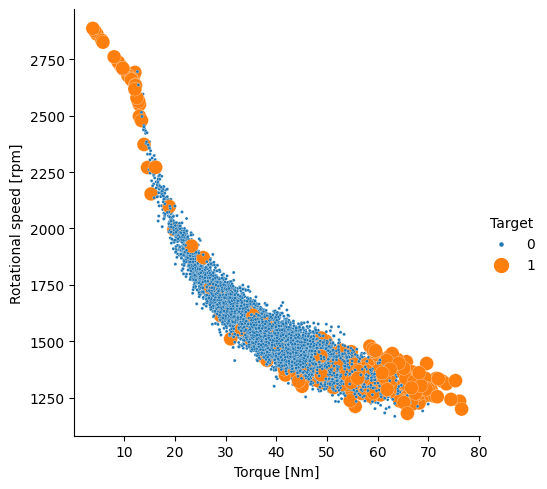

In [ ]:
_ = sns.relplot(x="Torque [Nm]", y="Rotational speed [rpm]", hue="Target",size="Target", sizes=(100, 5),data=df)

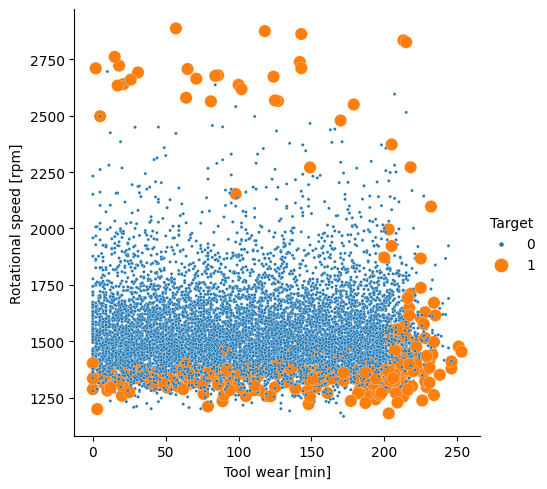

In [ ]:
_ = sns.relplot(x="Tool wear [min]",
                y="Rotational speed [rpm]",
                hue="Target",
                size="Target",
                sizes=(80, 5),
                data=df)

In [ ]:

df["Type"].replace({"H":0,"L":1,"M":2}, inplace=True)

In [ ]:
df["Failure Type"].replace({"No Failure": 0,"Heat Dissipation Failure": 1,"Power Failure": 2,"Overstrain Failure": 3,"Tool Wear Failure": 4,"Random Failures": 5},inplace=True)


In [ ]:
predictive_columns =['Type','Air temperature [K]',
 'Process temperature [K]',
 'Rotational speed [rpm]',
 'Torque [Nm]',
 'Tool wear [min]','Failure Type']
target_col=['Target']
X = df[predictive_columns]
y = df[target_col]

In [ ]:
y

,Target
0,0
1,0
2,0
3,0
4,0
...,...
9968,0
9969,0
9970,0
9971,0


In [ ]:

from sklearn.model_selection import StratifiedKFold
skf=StratifiedKFold(n_splits=5, random_state=None)
for train_index,test_index in skf.split(X,y):
    x1_train,x1_test=X.iloc[train_index],X.iloc[test_index]
    y1_train,y1_test=y.iloc[train_index],y.iloc[test_index]
    train_0, train_1 = len(y1_train[y1_train==0]), len(y1_train[y1_train==1])
    test_0, test_1 = len(y1_test[y1_test==0]), len(y1_test[y1_test==1])
    print('train: 0=%d, 1=%d, Test: 0=%d, 1=%d' % (train_0, train_1, test_0, test_1))

train: 0=7978, 1=7978, Test: 0=1995, 1=1995
train: 0=7978, 1=7978, Test: 0=1995, 1=1995
train: 0=7978, 1=7978, Test: 0=1995, 1=1995
train: 0=7979, 1=7979, Test: 0=1994, 1=1994
train: 0=7979, 1=7979, Test: 0=1994, 1=1994


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=40, test_size=0.33, stratify=y)

In [ ]:
from imblearn.combine import SMOTETomek
smote = SMOTETomek(random_state=42)
X1_res, y1_res = smote.fit_resample(X_train,y_train)

In [ ]:
X1_res.shape

(12862, 7)

In [ ]:
X1_res.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12862 entries, 0 to 12861
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Type                     12862 non-null  int64  
 1   Air temperature [K]      12862 non-null  float64
 2   Process temperature [K]  12862 non-null  float64
 3   Rotational speed [rpm]   12862 non-null  float64
 4   Torque [Nm]              12862 non-null  float64
 5   Tool wear [min]          12862 non-null  float64
 6   Failure Type             12862 non-null  int64  
dtypes: float64(5), int64(2)
memory usage: 703.5 KB


In [ ]:
X1_res

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Failure Type
0,1,303.900000,313.100000,1425.000000,49.300000,199.000000,0
1,1,302.900000,312.200000,1340.000000,57.800000,90.000000,0
2,0,297.900000,308.000000,1800.000000,24.800000,44.000000,0
3,1,302.300000,310.100000,1487.000000,46.000000,184.000000,0
4,1,303.500000,312.400000,1481.000000,43.700000,20.000000,0
...,...,...,...,...,...,...,...
12857,1,302.559641,310.482513,1327.017947,60.180258,94.017947,1
12858,1,301.753000,310.878688,1338.404375,64.162815,197.639372,2
12859,1,302.190522,310.667891,1326.905217,58.602131,90.036739,1
12860,1,298.048513,308.243315,1347.844066,58.805198,202.017326,3


In [ ]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9973 entries, 0 to 9972
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Target  9973 non-null   int64
dtypes: int64(1)
memory usage: 78.0 KB


In [ ]:
y1_res

,Target
0,0
1,0
2,0
3,0
4,0
...,...
12857,1
12858,1
12859,1
12860,1


In [ ]:
df_x = pd.DataFrame(X1_res)

In [ ]:
df_x["Type"].replace({0:"H",1:"L",2:"M"}, inplace=True)

In [ ]:
df_x["Failure Type"].replace({0:"No Failure",1:"Heat Dissipation Failure",2:"Power Failure",3:"Overstrain Failure",4:"Tool Wear Failure",5:"Random Failures"},inplace=True)


In [ ]:
df_y = pd.DataFrame(y1_res)

In [ ]:
df1 = pd.concat([df_x,df_y], axis=1)

In [ ]:
df1

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Failure Type,Target
0,L,303.900000,313.100000,1425.000000,49.300000,199.000000,No Failure,0
1,L,302.900000,312.200000,1340.000000,57.800000,90.000000,No Failure,0
2,H,297.900000,308.000000,1800.000000,24.800000,44.000000,No Failure,0
3,L,302.300000,310.100000,1487.000000,46.000000,184.000000,No Failure,0
4,L,303.500000,312.400000,1481.000000,43.700000,20.000000,No Failure,0
...,...,...,...,...,...,...,...,...
12857,L,302.559641,310.482513,1327.017947,60.180258,94.017947,Heat Dissipation Failure,1
12858,L,301.753000,310.878688,1338.404375,64.162815,197.639372,Power Failure,1
12859,L,302.190522,310.667891,1326.905217,58.602131,90.036739,Heat Dissipation Failure,1
12860,L,298.048513,308.243315,1347.844066,58.805198,202.017326,Overstrain Failure,1


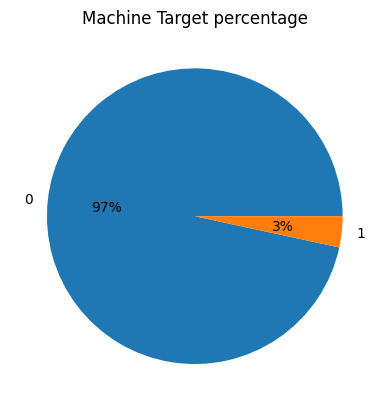

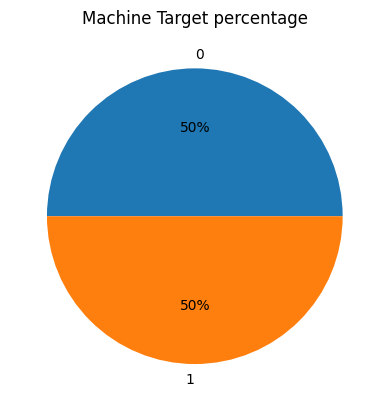

In [ ]:
# Pie chart of Target percentage
value = data['Target'].value_counts()
Type_percentage = 100*value/data.Type.shape[0]
labels = Type_percentage.index.array
x = Type_percentage.array
plt.pie(x, labels = labels, colors=sns.color_palette('tab10')[0:3], autopct='%.0f%%')
plt.title('Machine Target percentage')
plt.show()

# Pie chart of Target percentage after resampling
value = df1['Target'].value_counts()
Type_percentage = 100*value/data.Type.shape[0]
labels = Type_percentage.index.array
x = Type_percentage.array
plt.pie(x, labels = labels, colors=sns.color_palette('tab10')[0:3], autopct='%.0f%%')
plt.title('Machine Target percentage')
plt.show()

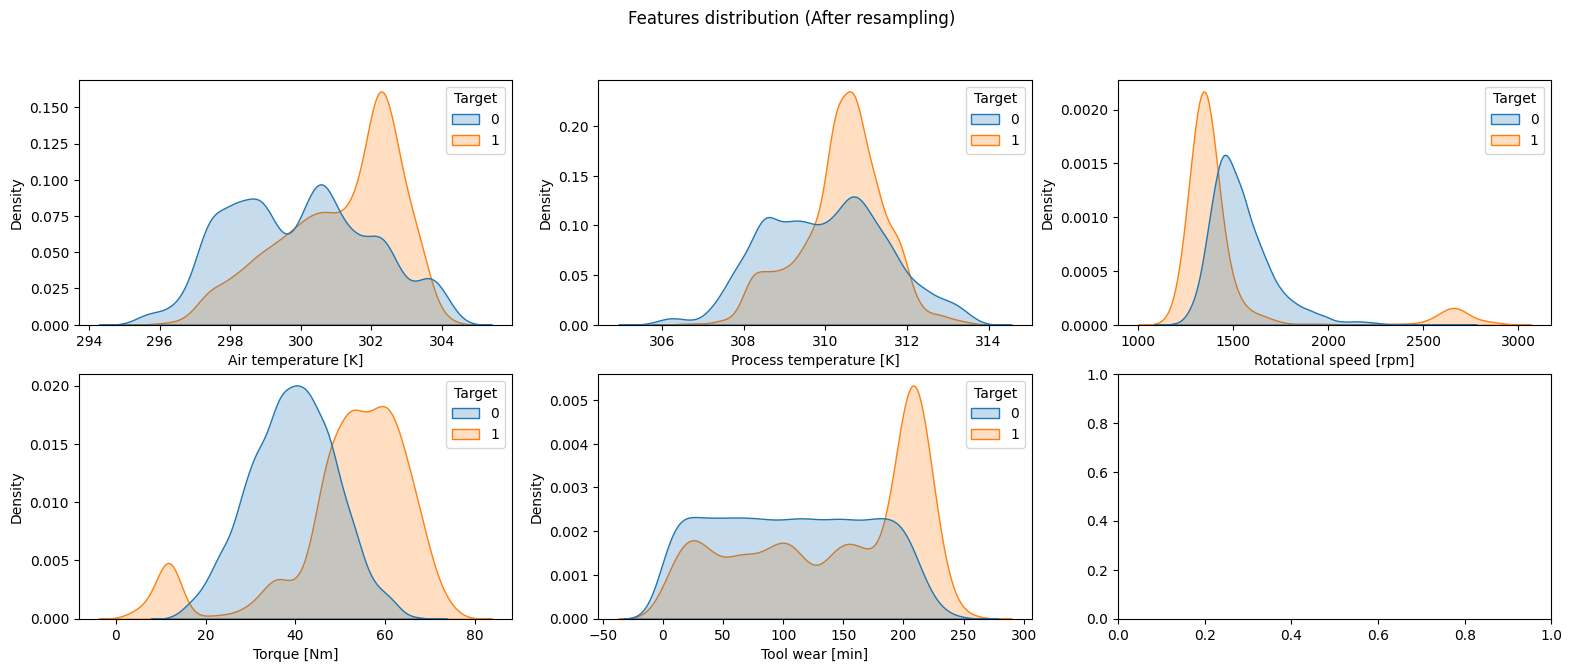

In [ ]:
# Kdeplot of numeric features (After resampling) - hue=Target
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(19,7))
fig.suptitle('Features distribution (After resampling)')
custom_palette = {0:'tab:blue', 1:'tab:orange'}
for j, feature in enumerate(num_features):
    sns.kdeplot(ax=axs[j//3, j-3*(j//3)], data=df1, x=feature,
              hue='Target', fill=True, palette=custom_palette)
plt.show()

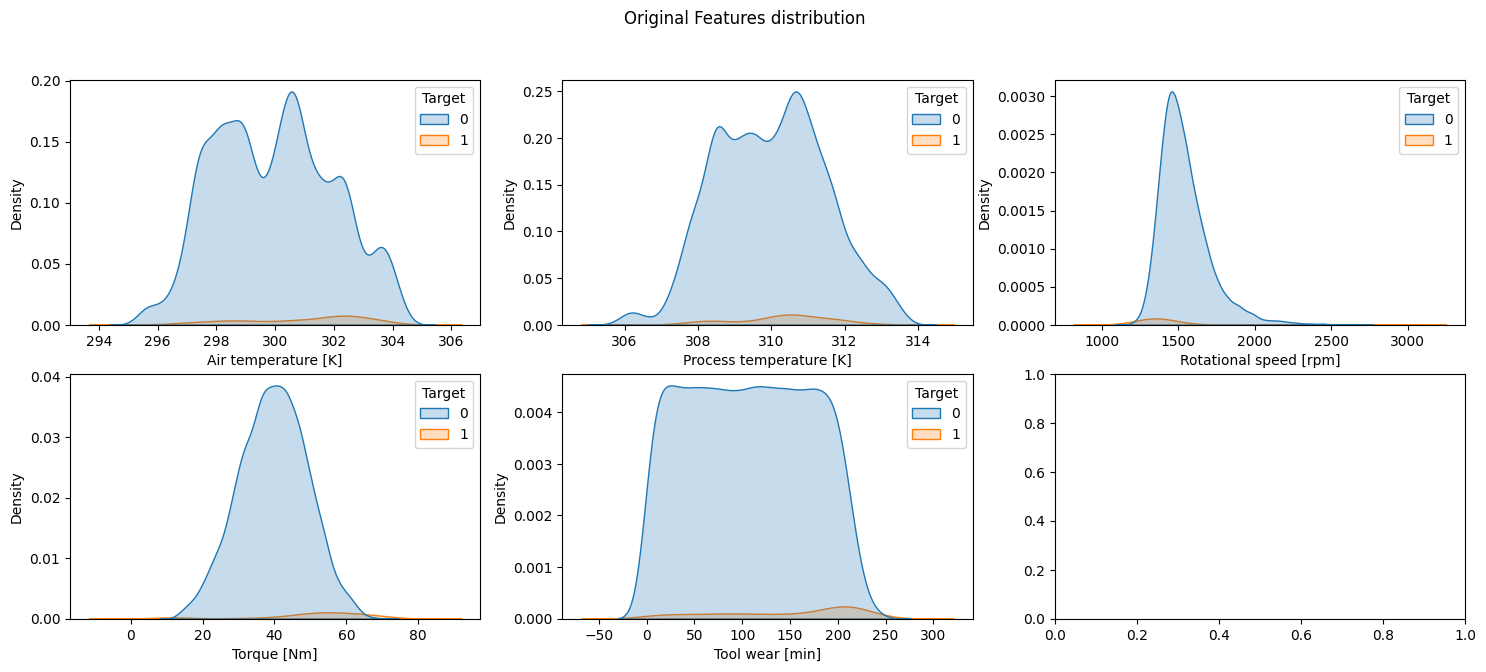

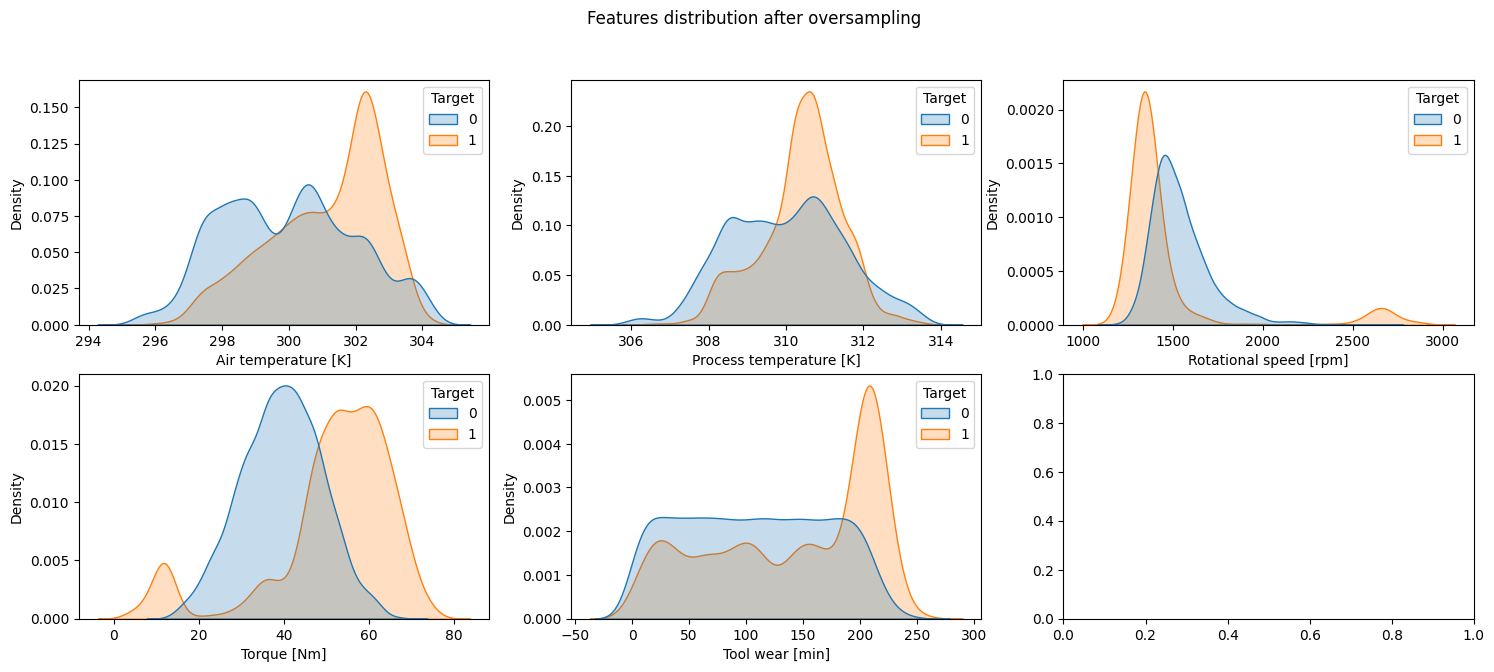

In [ ]:
# Kdeplot of numeric features (Original)
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(18,7))
fig.suptitle('Original Features distribution')
enumerate_features = enumerate(num_features)
for j, feature in enumerate_features:
    sns.kdeplot(ax=axs[j//3, j-3*(j//3)], data=df, x=feature,
                hue='Target', fill=True, palette='tab10')
plt.show()
# Kdeplot of numeric features (After resampling)
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(18,7))
fig.suptitle('Features distribution after oversampling')
enumerate_features = enumerate(num_features)
for j, feature in enumerate_features:
    sns.kdeplot(ax=axs[j//3, j-3*(j//3)], data=df1, x=feature,
                hue=df1['Target'], fill=True, palette='tab10')
plt.show()


In [ ]:
df['Target'].value_counts()

0    9643
1     330
Name: Target, dtype: int64

In [ ]:
df1['Target'].value_counts()

0    6431
1    6431
Name: Target, dtype: int64

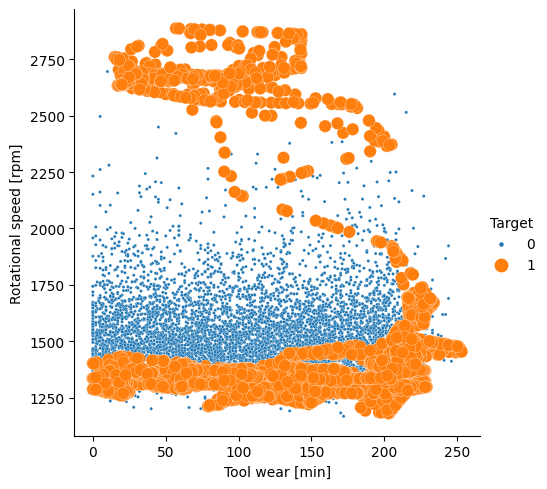

In [ ]:
_ = sns.relplot(x="Tool wear [min]",
                y="Rotational speed [rpm]",
                hue="Target",
                size="Target",
                sizes=(80, 5),
                data=df1)

In [ ]:
X_test.shape

(3292, 7)

In [ ]:
y_test.shape

(3292, 1)

# Building  preprocessor

In [ ]:
# Build categorical preprocessor
categorical_cols = X.select_dtypes(include="object").columns.to_list()
categorical_pipe = make_pipeline(OneHotEncoder(sparse=False, handle_unknown="ignore"))

# Build numeric processor
to_log = ["Rotational speed [rpm]",	"Tool wear [min]"]
to_scale = ["Air temperature [K]","Process temperature [K]", "Torque [Nm]"]
numeric_pipe_1 = make_pipeline(PowerTransformer())
numeric_pipe_2 = make_pipeline(StandardScaler())

# Full processor
full = ColumnTransformer(
    transformers=[
        ("categorical", categorical_pipe, categorical_cols),
        ("power_transform", numeric_pipe_1, to_log),
        ("standardization", numeric_pipe_2, to_scale)])

In [ ]:
y_train

,Target
5293,0
5586,0
268,0
4446,0
4898,0
...,...
168,1
627,0
1583,0
6658,0


In [ ]:
y1_res

,Target
0,0
1,0
2,0
3,0
4,0
...,...
12857,1
12858,1
12859,1
12860,1


In [ ]:
X1_res

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Failure Type
0,L,303.900000,313.100000,1425.000000,49.300000,199.000000,No Failure
1,L,302.900000,312.200000,1340.000000,57.800000,90.000000,No Failure
2,H,297.900000,308.000000,1800.000000,24.800000,44.000000,No Failure
3,L,302.300000,310.100000,1487.000000,46.000000,184.000000,No Failure
4,L,303.500000,312.400000,1481.000000,43.700000,20.000000,No Failure
...,...,...,...,...,...,...,...
12857,L,302.559641,310.482513,1327.017947,60.180258,94.017947,Heat Dissipation Failure
12858,L,301.753000,310.878688,1338.404375,64.162815,197.639372,Power Failure
12859,L,302.190522,310.667891,1326.905217,58.602131,90.036739,Heat Dissipation Failure
12860,L,298.048513,308.243315,1347.844066,58.805198,202.017326,Overstrain Failure


## **Light Gradient Boost Model**

In [ ]:
lgbm = OutputCodeClassifier(LGBMClassifier(), code_size=6, random_state=42)

In [ ]:
# Final pipeline combined with RandomForest
pipeline_lgbm = Pipeline(
    steps=[
        ("preprocess", full),
        ("base",lgbm,),])

In [ ]:

model_lgbm = pipeline_lgbm.fit(X1_res, y1_res)
y_pred_lgbm = model_lgbm.predict(X_test)

[LightGBM] [Info] Number of positive: 6431, number of negative: 6431
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000223 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1224
[LightGBM] [Info] Number of data points in the train set: 12862, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 6431, number of negative: 6431
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000170 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1224
[LightGBM] [Info] Number of data points in the train set: 12862, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.0

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Assuming y_test contains the true binary labels for your test data
# Compute predictions as shown in the previous response

# Accuracy
accuracy = accuracy_score(y_test, y_pred_lgbm)
print("Accuracy:", accuracy)

# Precision
precision = precision_score(y_test, y_pred_lgbm)
print("Precision:", precision)

# Recall
recall = recall_score(y_test, y_pred_lgbm)
print("Recall:", recall)

# F1 Score
f1 = f1_score(y_test, y_pred_lgbm)
print("F1 Score:", f1)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_lgbm)
print("Confusion Matrix:")
print(conf_matrix)



Accuracy: 0.965370595382746
Precision: 0.48633879781420764
Recall: 0.8165137614678899
F1 Score: 0.6095890410958903
Confusion Matrix:
[[3089   94]
 [  20   89]]


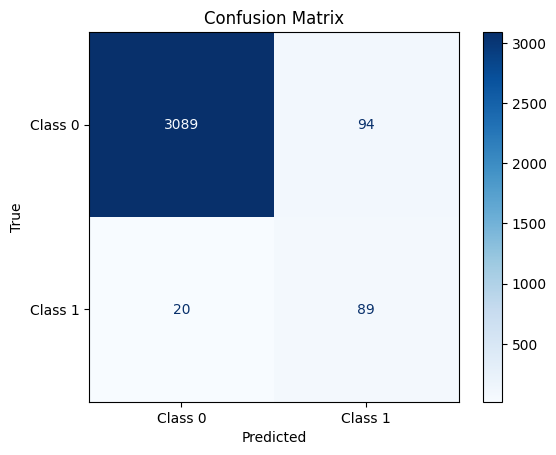

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_lgbm)

# Create a ConfusionMatrixDisplay object
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=["Class 0", "Class 1"])

# Plot the confusion matrix
disp.plot(cmap=plt.cm.Blues, values_format="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


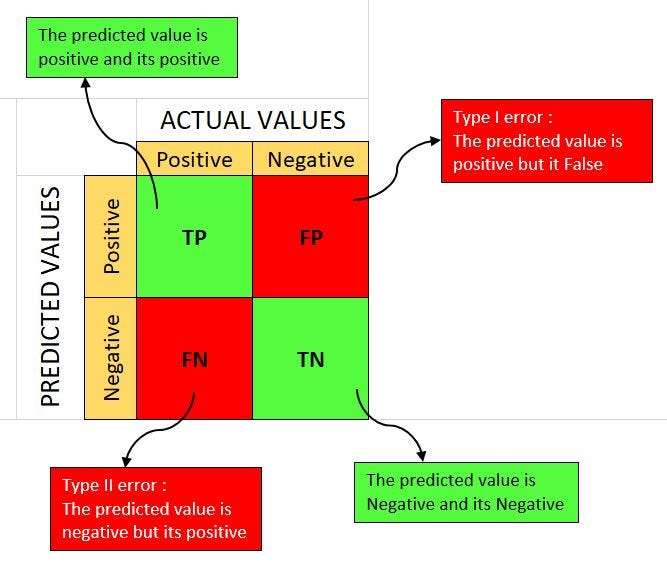

# **LogisticRegression Model**

In [ ]:
from sklearn.linear_model import LogisticRegression

# Create a Logistic Regression model
logistic_regression_model = LogisticRegression(random_state=42)

# Create a pipeline with preprocessing (if needed) and the Logistic Regression model
pipeline_logistic = Pipeline(
    steps=[
        ("preprocess", full),  # Include your preprocessing steps here
        ("logistic", logistic_regression_model),
    ]
)



# Fit the model to the training data
model_logistic = pipeline_logistic.fit(X1_res, y1_res)

# Make predictions on the test data
y_pred_logistic = model_logistic.predict(X_test)


In [ ]:


# Assuming you have imported your data and created X_test and y_test
# Also, ensure that your Logistic Regression model (logistic_regression_model) has been trained

# Make predictions on the test data
y_pred_logistic = model_logistic.predict(X_test)

# Calculate various evaluation metrics
accuracy = accuracy_score(y_test, y_pred_logistic)
precision = precision_score(y_test, y_pred_logistic)
recall = recall_score(y_test, y_pred_logistic)
f1 = f1_score(y_test, y_pred_logistic)
confusion = confusion_matrix(y_test, y_pred_logistic)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:")
print(confusion)


Accuracy: 0.7636695018226003
Precision: 0.09552599758162031
Recall: 0.7247706422018348
F1 Score: 0.16880341880341881
Confusion Matrix:
[[2435  748]
 [  30   79]]


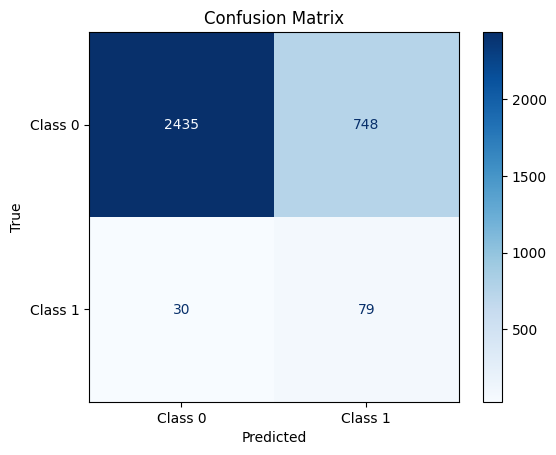

In [ ]:
# Create a ConfusionMatrixDisplay object
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred_logistic),
                              display_labels=["Class 0", "Class 1"])

# Plot the confusion matrix
disp.plot(cmap=plt.cm.Blues, values_format="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


### Logistic Regression Hyperparameter tuning

In [ ]:
#Step 1: Import Libraries
from sklearn.model_selection import GridSearchCV



In [ ]:

# Create a logistic regression model without regularization (penalty='none')
logistic_regression_model = LogisticRegression(penalty='none', solver='lbfgs', max_iter=10000)

pipeline_logistic = Pipeline(
    steps=[
        ("preprocess", full),  # Include your preprocessing steps here
        ("logistic", logistic_regression_model),
    ]
)

# Define other hyperparameters and create a GridSearchCV object
param_grid = {
    'logistic__C': [0.001, 0.01, 0.1, 1, 10]  # Note the use of 'logistic__C' here
}

grid_search = GridSearchCV(pipeline_logistic, param_grid, cv=5)

# Fit the grid search to your data
grid_search.fit(X1_res, y1_res)



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('categorical',
                                                                         Pipeline(steps=[('onehotencoder',
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                                                                        sparse=False))]),
                                                                         []),
                                                                        ('power_transform',
                                                                         Pipeline(steps=[('powertransformer',
                                                                                          PowerTransformer())]),
                                                                         ['Rotational '
                                                                          'speed '
                                                                          '[rpm]',
                                                                          'Tool '
                                                                          'wear '
                                                                          '[min]']),
                                                                        ('standardization',
                                                                         Pipeline(steps=[('standardscaler',
                                                                                          StandardScaler())]),
                                                                         ['Air '
                                                                          'temperature '
                                                                          '[K]',
                                                                          'Process '
                                                                          'temperature '
                                                                          '[K]',
                                                                          'Torque '
                                                                          '[Nm]'])])),
                                       ('logistic',
                                        LogisticRegression(max_iter=10000,
                                                           penalty='none'))]),
             param_grid={'logistic__C': [0.001, 0.01, 0.1, 1, 10]})

In [ ]:
#Step 5: Find the Best Hyperparameters
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Hyperparameters:", best_params)
print("Best Validation Score:", best_score)


Best Hyperparameters: {'logistic__C': 0.001}
Best Validation Score: 0.8071068198948405


In [ ]:
X_test.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Failure Type
2121,1,299.3,309.0,1449.0,46.5,121.0,0
896,1,295.5,306.1,1573.0,35.1,129.0,0
2271,1,299.3,308.7,1393.0,54.2,80.0,0
4828,0,303.4,311.9,1402.0,50.0,54.0,0
3419,1,301.6,310.6,1562.0,34.4,162.0,0


In [ ]:
X1_res.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Failure Type
0,1,303.9,313.1,1425.0,49.3,199.0,0
1,1,302.9,312.2,1340.0,57.8,90.0,0
2,0,297.9,308.0,1800.0,24.8,44.0,0
3,1,302.3,310.1,1487.0,46.0,184.0,0
4,1,303.5,312.4,1481.0,43.7,20.0,0


In [ ]:
# Assuming you have a test dataset X_test


# Create a logistic regression model with the best 'C' value
best_logistic_regression_model = LogisticRegression(solver='lbfgs', max_iter=10000, C=0.001)


# Fit the model on the entire training dataset (X1_res, y1_res)
best_logistic_regression_model.fit(X1_res, y1_res)

# Make predictions on the test data
y_pred_best = best_logistic_regression_model.predict(X_test)

# You can now use y_pred for further analysis or evaluation


In [ ]:
import warnings
from sklearn.exceptions import DataConversionWarning
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Suppress the DataConversionWarning
warnings.filterwarnings("ignore", category=DataConversionWarning)

# Calculate and print various evaluation metrics
accuracy = accuracy_score(y_test, y_pred_best)
precision = precision_score(y_test, y_pred_best)
recall = recall_score(y_test, y_pred_best)
f1 = f1_score(y_test, y_pred_best)
confusion = confusion_matrix(y_test, y_pred_best)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:")
print(confusion)


Accuracy: 0.9638517618469016
Precision: 0.47641509433962265
Recall: 0.926605504587156
F1 Score: 0.6292834890965733
Confusion Matrix:
[[3072  111]
 [   8  101]]


In [ ]:


# Calculate the test score (accuracy) of the model
test_score = best_logistic_regression_model.score(X_test, y_test)

# Print the test score
print(f"Test Score (Accuracy): {test_score:.2f}")


Test Score (Accuracy): 0.96


In [ ]:
from sklearn.metrics import roc_auc_score

# Assuming you have already trained and fitted your model (best_logistic_regression_model) and have test data (X_test, y_test)

# Calculate the predicted probabilities for the positive class
y_pred_prob = best_logistic_regression_model.predict_proba(X_test)[:, 1]

# Calculate the ROC-AUC score
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Print the ROC-AUC score
print(f"ROC-AUC Score: {roc_auc:.2f}")



ROC-AUC Score: 0.99


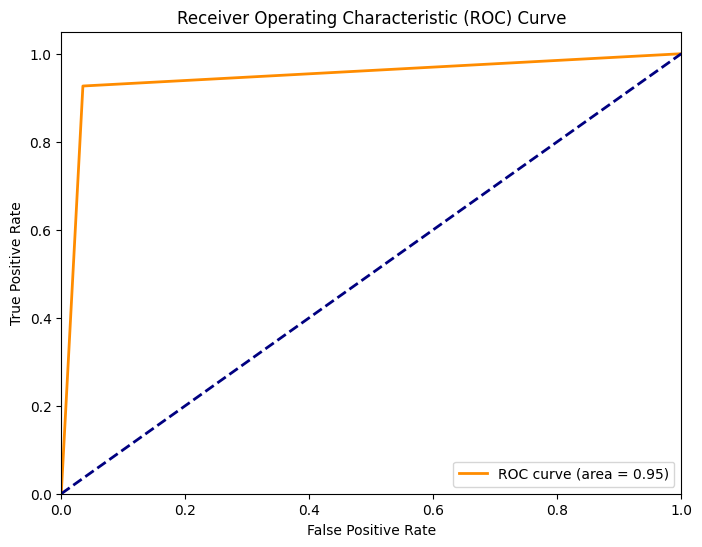

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_best)

# Calculate the AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()



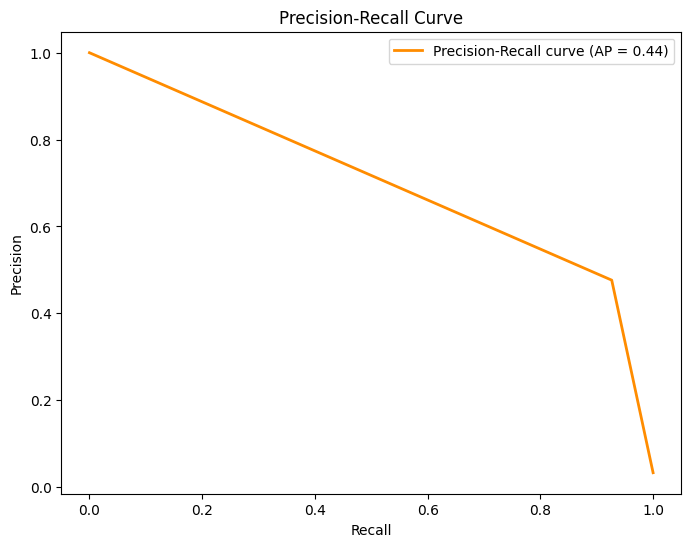

In [ ]:
from sklearn.metrics import precision_recall_curve, average_precision_score

# Calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_best)

# Calculate Average Precision (AP)
average_precision = average_precision_score(y_test, y_pred_best)

# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='darkorange', lw=2, label=f'Precision-Recall curve (AP = {average_precision:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.show()


# Garadient Boosting Algorithm


In [ ]:

from sklearn.ensemble import GradientBoostingClassifier



# Create a pipeline with preprocessing and the Gradient Boosting Classifier model
pipeline_gb = Pipeline([
    ("preprocess", full),
    ("model", GradientBoostingClassifier(
        n_estimators=100,  # Number of boosting stages (trees)
        learning_rate=0.1,  # Step size shrinkage to prevent overfitting
        max_depth=3,  # Maximum depth of individual trees
        random_state=42  # Random seed for reproducibility
    ))
])

# Train the model using the pipeline on the training data
pipeline_gb.fit(X1_res, y1_res)

# Make predictions on the test data using the pipeline
y_pred_gradient_boosting = pipeline_gb.predict(X_test)




In [ ]:
# Calculate and print various evaluation metrics
accuracy = accuracy_score(y_test, y_pred_gradient_boosting)
precision = precision_score(y_test, y_pred_gradient_boosting)
recall = recall_score(y_test, y_pred_gradient_boosting)
f1 = f1_score(y_test, y_pred_gradient_boosting)
confusion = confusion_matrix(y_test, y_pred_gradient_boosting)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:")
print(confusion)

Accuracy: 0.9161603888213852
Precision: 0.2607449856733524
Recall: 0.8348623853211009
F1 Score: 0.3973799126637554
Confusion Matrix:
[[2925  258]
 [  18   91]]


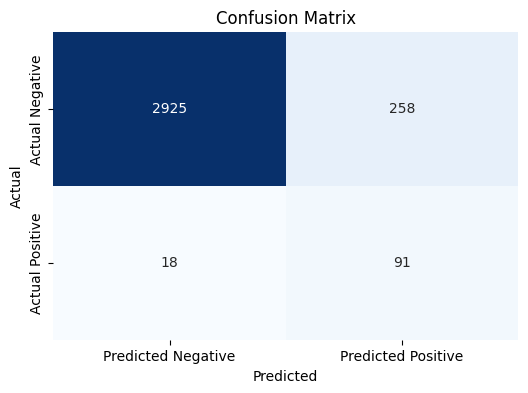

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have your confusion matrix (confusion) already calculated

# Create a heatmap of the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Support Vector Machine (SVM)

In [ ]:
# Support Vector Machine (SVM)
from sklearn.svm import SVC
svm_model = SVC(random_state=42)
pipeline_svm = Pipeline([
    ("preprocess", full),
    ("model", svm_model)
])
pipeline_svm.fit(X1_res, y1_res)
y_pred_svm = pipeline_svm.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Assuming you have your true labels (y_test) and predicted labels (y_pred) for binary classification

# Accuracy
accuracy = accuracy_score(y_test, y_pred_svm)
print("Accuracy:", accuracy)

# Precision
precision = precision_score(y_test, y_pred_svm)
print("Precision:", precision)

# Recall
recall = recall_score(y_test, y_pred_svm)
print("Recall:", recall)

# F1 Score
f1 = f1_score(y_test, y_pred_svm)
print("F1 Score:", f1)

# ROC AUC Score
roc_auc = roc_auc_score(y_test, y_pred_svm)
print("ROC AUC Score:", roc_auc)

# Confusion Matrix
confusion = confusion_matrix(y_test, y_pred_svm)
print("Confusion Matrix:")
print(confusion)


Accuracy: 0.8970230862697448
Precision: 0.22488038277511962
Recall: 0.8623853211009175
F1 Score: 0.3567362428842505
ROC AUC Score: 0.880297278835096
Confusion Matrix:
[[2859  324]
 [  15   94]]


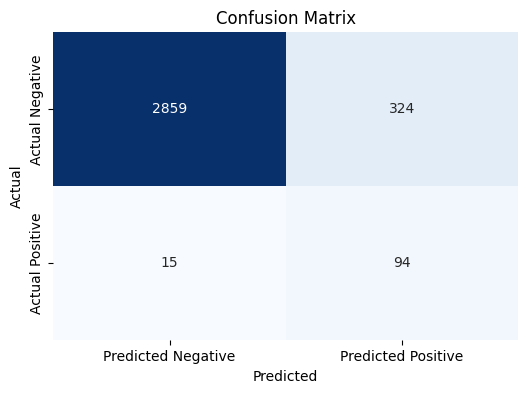

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have your confusion matrix (confusion) already calculated

# Create a heatmap of the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Random Forest Classifier

In [ ]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
random_forest_model = RandomForestClassifier(random_state=42)
pipeline_rf = Pipeline([
    ("preprocess", full),
    ("model", random_forest_model)
])
pipeline_rf.fit(X1_res, y1_res)
y_pred_rf = pipeline_rf.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Assuming you have your true labels (y_test) and predicted labels (y_pred) for binary classification

# Accuracy
accuracy = accuracy_score(y_test, y_pred_rf)
print("Accuracy:", accuracy)

# Precision
precision = precision_score(y_test, y_pred_rf)
print("Precision:", precision)

# Recall
recall = recall_score(y_test, y_pred_rf)
print("Recall:", recall)

# F1 Score
f1 = f1_score(y_test, y_pred_rf)
print("F1 Score:", f1)

# ROC AUC Score
roc_auc = roc_auc_score(y_test, y_pred_rf)
print("ROC AUC Score:", roc_auc)

# Confusion Matrix
confusion = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix:")
print(confusion)


Accuracy: 0.9438031591737546
Precision: 0.33185840707964603
Recall: 0.6880733944954128
F1 Score: 0.4477611940298507
ROC AUC Score: 0.820316936016164
Confusion Matrix:
[[3032  151]
 [  34   75]]


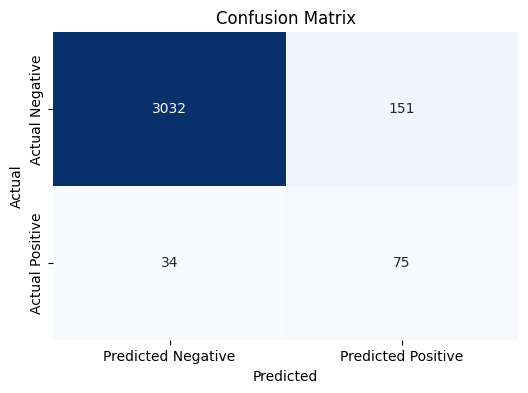

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have your confusion matrix (confusion) already calculated

# Create a heatmap of the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# K-Nearest Neighbors (KNN)

In [ ]:
# K-Nearest Neighbors (KNN)
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()
pipeline_knn = Pipeline([
    ("preprocess", full),
    ("model", knn_model)
])
pipeline_knn.fit(X1_res, y1_res)
y_pred_knn = pipeline_knn.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Assuming you have your true labels (y_test) and predicted labels (y_pred) for binary classification

# Accuracy
accuracy = accuracy_score(y_test, y_pred_knn)
print("Accuracy:", accuracy)

# Precision
precision = precision_score(y_test, y_pred_knn)
print("Precision:", precision)

# Recall
recall = recall_score(y_test, y_pred_knn)
print("Recall:", recall)

# F1 Score
f1 = f1_score(y_test, y_pred_knn)
print("F1 Score:", f1)

# ROC AUC Score
roc_auc = roc_auc_score(y_test, y_pred_knn)
print("ROC AUC Score:", roc_auc)

# Confusion Matrix
confusion = confusion_matrix(y_test, y_pred_knn)
print("Confusion Matrix:")
print(confusion)


Accuracy: 0.9158566221142163
Precision: 0.24074074074074073
Recall: 0.7155963302752294
F1 Score: 0.36027713625866054
ROC AUC Score: 0.819155375316691
Confusion Matrix:
[[2937  246]
 [  31   78]]


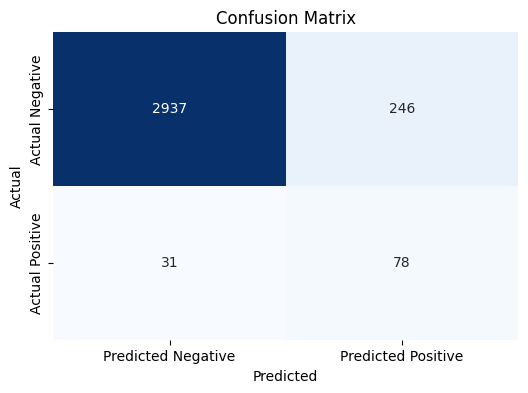

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have your confusion matrix (confusion) already calculated

# Create a heatmap of the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Neural Network (MLP)

In [ ]:
# Neural Network (MLP)
from sklearn.neural_network import MLPClassifier
mlp_model = MLPClassifier(random_state=42,max_iter=500)
pipeline_mlp = Pipeline([
    ("preprocess", full),
    ("model", mlp_model)
])
pipeline_mlp.fit(X1_res, y1_res)
y_pred_mlp = pipeline_mlp.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Assuming you have your true labels (y_test) and predicted labels (y_pred) for binary classification

# Accuracy
accuracy = accuracy_score(y_test, y_pred_mlp)
print("Accuracy:", accuracy)

# Precision
precision = precision_score(y_test, y_pred_mlp)
print("Precision:", precision)

# Recall
recall = recall_score(y_test, y_pred_mlp)
print("Recall:", recall)

# F1 Score
f1 = f1_score(y_test, y_pred_mlp)
print("F1 Score:", f1)

# ROC AUC Score
roc_auc = roc_auc_score(y_test, y_pred_mlp)
print("ROC AUC Score:", roc_auc)

# Confusion Matrix
confusion = confusion_matrix(y_test, y_pred_mlp)
print("Confusion Matrix:")
print(confusion)


Accuracy: 0.9161603888213852
Precision: 0.26345609065155806
Recall: 0.8532110091743119
F1 Score: 0.4025974025974026
ROC AUC Score: 0.8857635316056919
Confusion Matrix:
[[2923  260]
 [  16   93]]


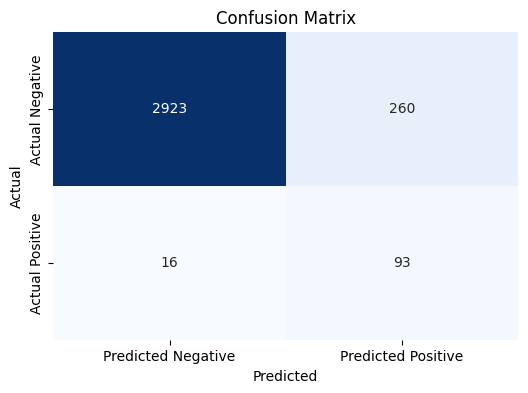

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have your confusion matrix (confusion) already calculated

# Create a heatmap of the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# LightGBM

In [ ]:
# LightGBM
from lightgbm import LGBMClassifier
lgbm_model = LGBMClassifier(random_state=42)
pipeline_lgbm = Pipeline([
    ("preprocess", full),
    ("model", lgbm_model)
])
pipeline_lgbm.fit(X1_res, y1_res)
y_pred_lgbm = pipeline_lgbm.predict(X_test)


[LightGBM] [Info] Number of positive: 6431, number of negative: 6431
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000635 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1224
[LightGBM] [Info] Number of data points in the train set: 12862, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Assuming you have your true labels (y_test) and predicted labels (y_pred) for binary classification

# Accuracy
accuracy = accuracy_score(y_test, y_pred_lgbm)
print("Accuracy:", accuracy)

# Precision
precision = precision_score(y_test, y_pred_lgbm)
print("Precision:", precision)

# Recall
recall = recall_score(y_test, y_pred_lgbm)
print("Recall:", recall)

# F1 Score
f1 = f1_score(y_test, y_pred_lgbm)
print("F1 Score:", f1)

# ROC AUC Score
roc_auc = roc_auc_score(y_test, y_pred_lgbm)
print("ROC AUC Score:", roc_auc)

# Confusion Matrix
confusion = confusion_matrix(y_test, y_pred_lgbm)
print("Confusion Matrix:")
print(confusion)


Accuracy: 0.965370595382746
Precision: 0.48633879781420764
Recall: 0.8165137614678899
F1 Score: 0.6095890410958903
ROC AUC Score: 0.8934909366560311
Confusion Matrix:
[[3089   94]
 [  20   89]]


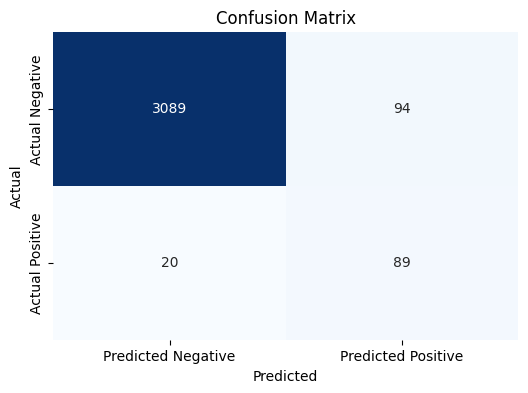

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have your confusion matrix (confusion) already calculated

# Create a heatmap of the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Decision Tree Classifier

In [ ]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
decision_tree_model = DecisionTreeClassifier(random_state=42)
pipeline_dt = Pipeline([
    ("preprocess", full),
    ("model", decision_tree_model)
])
pipeline_dt.fit(X1_res, y1_res)
y_pred_dt = pipeline_dt.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Assuming you have your true labels (y_test) and predicted labels (y_pred) for binary classification

# Accuracy
accuracy = accuracy_score(y_test, y_pred_dt)
print("Accuracy:", accuracy)

# Precision
precision = precision_score(y_test, y_pred_dt)
print("Precision:", precision)

# Recall
recall = recall_score(y_test, y_pred_dt)
print("Recall:", recall)

# F1 Score
f1 = f1_score(y_test, y_pred_dt)
print("F1 Score:", f1)

# ROC AUC Score
roc_auc = roc_auc_score(y_test, y_pred_dt)
print("ROC AUC Score:", roc_auc)

# Confusion Matrix
confusion = confusion_matrix(y_test, y_pred_dt)
print("Confusion Matrix:")
print(confusion)


Accuracy: 0.945625759416768
Precision: 0.325
Recall: 0.5963302752293578
F1 Score: 0.4207119741100324
ROC AUC Score: 0.776958728566611
Confusion Matrix:
[[3048  135]
 [  44   65]]


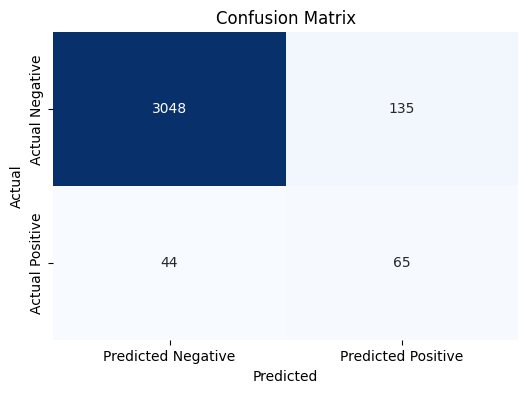

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have your confusion matrix (confusion) already calculated

# Create a heatmap of the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Adaboost Classifier

In [ ]:
# Adaboost Classifier
from sklearn.ensemble import AdaBoostClassifier
adaboost_model = AdaBoostClassifier(random_state=42)
pipeline_adaboost = Pipeline([
    ("preprocess", full),
    ("model", adaboost_model)
])
pipeline_adaboost.fit(X1_res, y1_res)
y_pred_adaboost = pipeline_adaboost.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Assuming you have your true labels (y_test) and predicted labels (y_pred) for binary classification

# Accuracy
accuracy = accuracy_score(y_test, y_pred_adaboost)
print("Accuracy:", accuracy)

# Precision
precision = precision_score(y_test, y_pred_adaboost)
print("Precision:", precision)

# Recall
recall = recall_score(y_test, y_pred_adaboost)
print("Recall:", recall)

# F1 Score
f1 = f1_score(y_test, y_pred_adaboost)
print("F1 Score:", f1)

# ROC AUC Score
roc_auc = roc_auc_score(y_test, y_pred_adaboost)
print("ROC AUC Score:", roc_auc)

# Confusion Matrix
confusion = confusion_matrix(y_test, y_pred_adaboost)
print("Confusion Matrix:")
print(confusion)


Accuracy: 0.913730255164034
Precision: 0.2562674094707521
Recall: 0.8440366972477065
F1 Score: 0.39316239316239326
ROC AUC Score: 0.880076784062119
Confusion Matrix:
[[2916  267]
 [  17   92]]


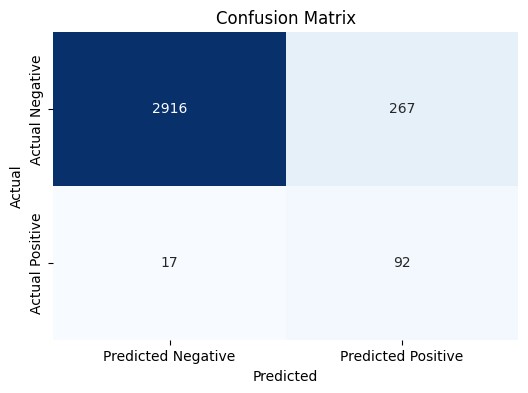

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have your confusion matrix (confusion) already calculated

# Create a heatmap of the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Gradient Descent-Based Models (SGD)

In [ ]:

# Gradient Descent-Based Models (SGD)
from sklearn.linear_model import SGDClassifier
sgd_model = SGDClassifier(random_state=42)
pipeline_sgd = Pipeline([
    ("preprocess", full),
    ("model", sgd_model)
])
pipeline_sgd.fit(X1_res, y1_res)
y_pred_sgd = pipeline_sgd.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Assuming you have your true labels (y_test) and predicted labels (y_pred) for binary classification

# Accuracy
accuracy = accuracy_score(y_test, y_pred_sgd)
print("Accuracy:", accuracy)

# Precision
precision = precision_score(y_test, y_pred_sgd)
print("Precision:", precision)

# Recall
recall = recall_score(y_test, y_pred_sgd)
print("Recall:", recall)

# F1 Score
f1 = f1_score(y_test, y_pred_sgd)
print("F1 Score:", f1)

# ROC AUC Score
roc_auc = roc_auc_score(y_test, y_pred_sgd)
print("ROC AUC Score:", roc_auc)

# Confusion Matrix
confusion = confusion_matrix(y_test, y_pred_sgd)
print("Confusion Matrix:")
print(confusion)


Accuracy: 0.7876670716889429
Precision: 0.10242587601078167
Recall: 0.6972477064220184
F1 Score: 0.17861339600470033
ROC AUC Score: 0.7440055685738745
Confusion Matrix:
[[2517  666]
 [  33   76]]


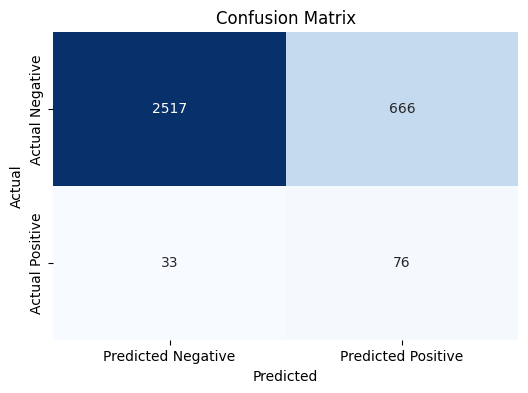

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have your confusion matrix (confusion) already calculated

# Create a heatmap of the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Extreme Gradient Boosting (XGBoost)

In [ ]:
# Extreme Gradient Boosting (XGBoost)
from xgboost import XGBClassifier
xgb_model = XGBClassifier(random_state=42)
pipeline_xgb = Pipeline([
    ("preprocess", full),
    ("model", xgb_model)
])
pipeline_xgb.fit(X1_res, y1_res)
y_pred_xgb = pipeline_xgb.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Assuming you have your true labels (y_test) and predicted labels (y_pred) for binary classification

# Accuracy
accuracy = accuracy_score(y_test, y_pred_xgb)
print("Accuracy:", accuracy)

# Precision
precision = precision_score(y_test, y_pred_xgb)
print("Precision:", precision)

# Recall
recall = recall_score(y_test, y_pred_xgb)
print("Recall:", recall)

# F1 Score
f1 = f1_score(y_test, y_pred_xgb)
print("F1 Score:", f1)

# ROC AUC Score
roc_auc = roc_auc_score(y_test, y_pred_xgb)
print("ROC AUC Score:", roc_auc)

# Confusion Matrix
confusion = confusion_matrix(y_test, y_pred_xgb)
print("Confusion Matrix:")
print(confusion)


Accuracy: 0.9732685297691372
Precision: 0.5686274509803921
Recall: 0.7981651376146789
F1 Score: 0.66412213740458
ROC AUC Score: 0.8887149910505062
Confusion Matrix:
[[3117   66]
 [  22   87]]


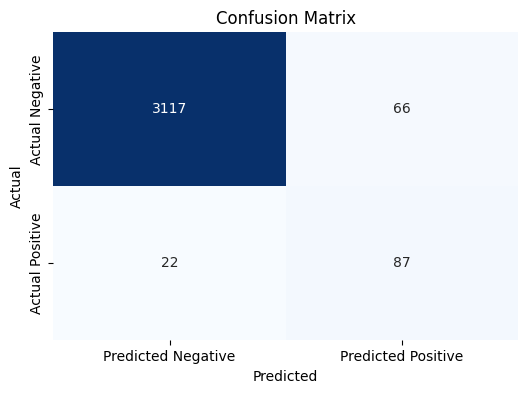

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have your confusion matrix (confusion) already calculated

# Create a heatmap of the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#Hypertuning *XG* Boost

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV


param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_child_weight': [1, 2, 3],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

xgb = XGBClassifier(objective='binary:logistic', random_state=42)
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, scoring='accuracy', cv=5, verbose=2)
grid_search.fit(X1_res, y1_res)


Fitting 5 folds for each of 729 candidates, totalling 3645 fits
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, subsample=0.9; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, subsample=0.9; tot

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=42, ...),
             param_grid={'colsample_bytree': [0.8, 0.9, 1.0],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5], 'min_child_weight': [1, 2, 3],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.8, 0.9, 1.0]},
             scoring='accuracy', verbose=2)

In [ ]:
# Define a dictionary that maps old column names to new column names
new_column_names = {
    'Type': 'New_Type',
    'Air temperature [K]': 'New_Air_Temperature',
    'Process temperature [K]': 'New_Process_Temperature',
    'Rotational speed [rpm]': 'New_Rotational_Speed',
    'Torque [Nm]': 'New_Torque',
    'Tool wear [min]': 'New_Tool_Wear',
    'Failure Type': 'New_Failure_Type'
}

# Use the rename method to change the column names
X1_res.rename(columns=new_column_names, inplace=True)

# Display the DataFrame with the new column names
print(X1_res.columns)


Index(['New_Type', 'New_Air_Temperature', 'New_Process_Temperature',
       'New_Rotational_Speed', 'New_Torque', 'New_Tool_Wear',
       'New_Failure_Type'],
      dtype='object')


In [ ]:
best_params = grid_search.best_params_
best_xgb = grid_search.best_estimator_
print("Best Hyperparameters:", best_params)
print("Best Validation Score:", best_xgb)



Best Hyperparameters: {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 100, 'subsample': 0.8}
Best Validation Score: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)


In [ ]:
# Define a dictionary that maps old column names to new column names
new_column_names = {
    'Type': 'New_Type',
    'Air temperature [K]': 'New_Air_Temperature',
    'Process temperature [K]': 'New_Process_Temperature',
    'Rotational speed [rpm]': 'New_Rotational_Speed',
    'Torque [Nm]': 'New_Torque',
    'Tool wear [min]': 'New_Tool_Wear',
    'Failure Type': 'New_Failure_Type'
}

# Use the rename method to change the column names
X1_res.rename(columns=new_column_names, inplace=True)

# Display the DataFrame with the new column names
print(X1_res.columns)


In [ ]:
# Define a dictionary that maps old column names to new column names
new_column_names = {
    'Type': 'New_Type',
    'Air temperature [K]': 'New_Air_Temperature',
    'Process temperature [K]': 'New_Process_Temperature',
    'Rotational speed [rpm]': 'New_Rotational_Speed',
    'Torque [Nm]': 'New_Torque',
    'Tool wear [min]': 'New_Tool_Wear',
    'Failure Type': 'New_Failure_Type'
}

# Use the rename method to change the column names
X_test.rename(columns=new_column_names, inplace=True)

# Display the DataFrame with the new column names
print(X_test.columns)


Index(['New_Type', 'New_Air_Temperature', 'New_Process_Temperature',
       'New_Rotational_Speed', 'New_Torque', 'New_Tool_Wear',
       'New_Failure_Type'],
      dtype='object')


In [ ]:
from xgboost import XGBClassifier

# Create an XGBoost classifier with the best hyperparameters
best_xgb = XGBClassifier(
    colsample_bytree=0.8,
    learning_rate=0.01,
    max_depth=3,
    min_child_weight=1,
    n_estimators=100,
    subsample=0.8,
    random_state=42  # You can include other relevant parameters here
)

# Train the XGBoost model on your training data
best_xgb.fit(X1_res, y1_res)

# Make predictions on your test data
y_pred = best_xgb.predict(X_test)

# Evaluate the model's performance on the test data


In [ ]:
y_pred = best_xgb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)


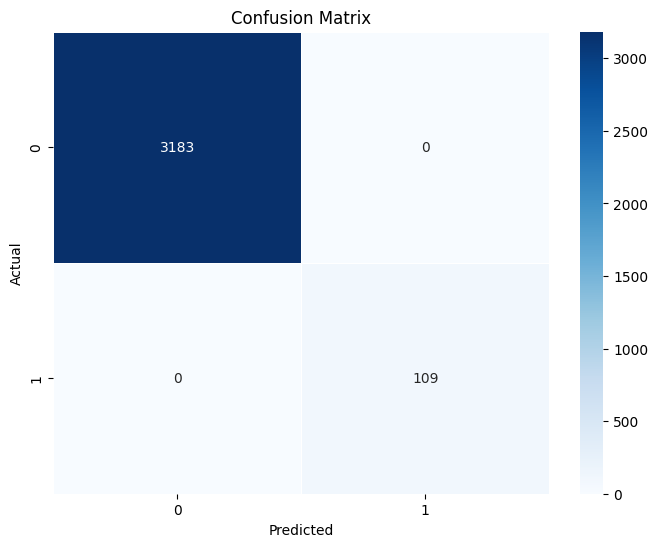

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", linewidths=0.5)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Precision: 1.0
Recall: 1.0
F1 Score: 1.0


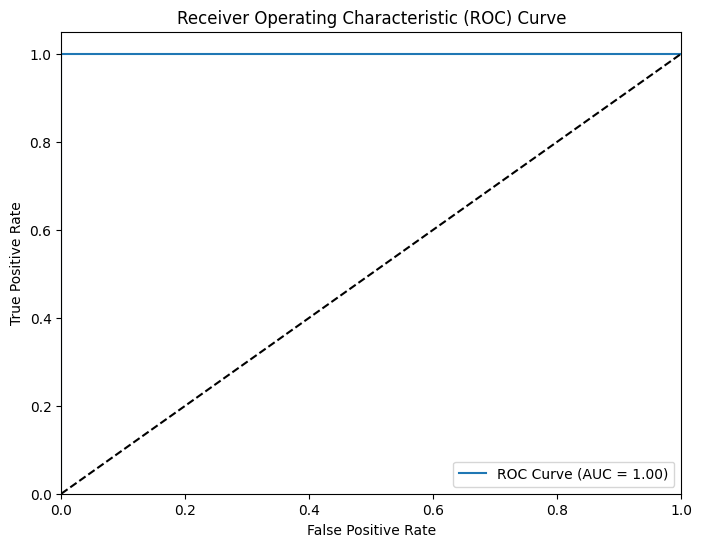

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Calculate the ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, best_xgb.predict_proba(X_test)[:, 1])
auc = roc_auc_score(y_test, best_xgb.predict_proba(X_test)[:, 1])

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


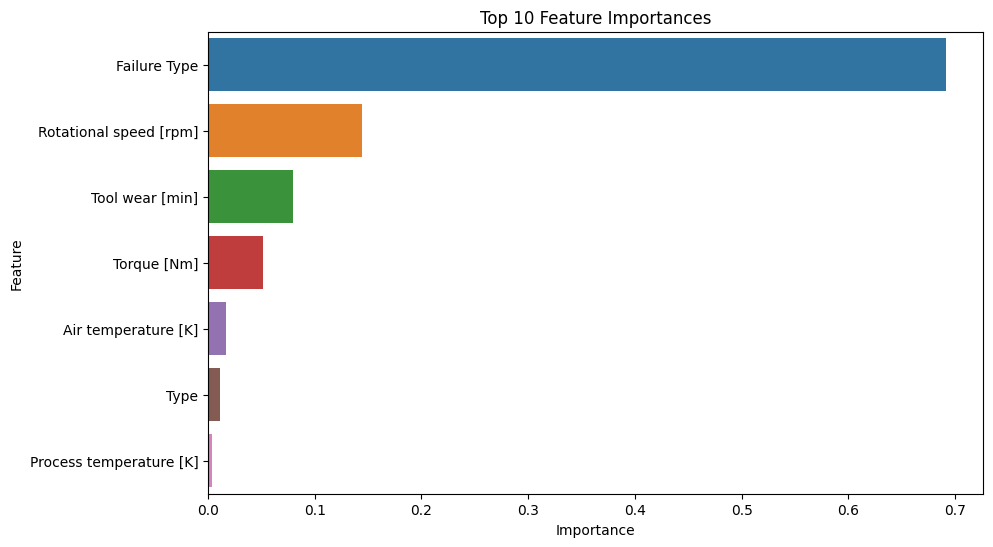

In [ ]:
importances = best_xgb.feature_importances_
feature_names = X_train.columns

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the top N important features
top_n = 10  # Adjust the number of top features to display
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df[:top_n])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top {} Feature Importances'.format(top_n))
plt.show()
